In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview
The `music.csv` dataset contains 11 columns and 1,994 entries. Key columns include:
- **title**: Name of the song.
- **artist**: Artist name.
- **year**: Release year.
- **bpm**: Beats per minute (tempo).
- **energy**: Energy level (intensity).
- **dance**: Danceability score.
- **valence**: Positivity score.
- **duration**: Duration of the song in minutes.
- **popularity**: Popularity score.
- **genre**: Genre of the song.

### Exercise 1a
**Groupby Basics**
   - Group the dataset by `genre` and calculate:
     - The average `popularity` for each genre.
     - The total number of songs per genre.
   - Display the results into a single DataFrame.

In [2]:
music = pd.read_csv("music.csv")
music.head()

,Unnamed: 0,title,artist,year,bpm,energy,dance,valence,duration,popularity,genre
0,0,Sunrise,Norah Jones,2004,157,30,53,68,3.350000,71,adult standards
1,1,Black Night,Deep Purple,2000,135,79,50,81,3.450000,39,album rock
2,2,Clint Eastwood,Gorillaz,2001,168,69,66,52,5.683333,69,alternative hip hop
3,3,The Pretender,Foo Fighters,2007,173,96,43,37,4.483333,76,alternative metal
4,4,Waitin' On A Sunny Day,Bruce Springsteen,2002,106,82,58,87,4.266667,59,classic rock


In [13]:
#Group the dataset by `genre` 
grouped_data = music.groupby('genre')

#     calculate the average `popularity` for each genre.
average_popularity_per_genre = grouped_data['popularity'].mean()

#     calculate the total number of songs per genre.
total_songs_per_genre = grouped_data['title'].count()

# Display the results into a single DataFrame.
genre_summary = pd.DataFrame({
    'Average Popularity': average_popularity_per_genre,
    'Total Songs': total_songs_per_genre
}).reset_index()

genre_summary.head()

,genre,Average Popularity,Total Songs
0,acid jazz,69.000000,1
1,acoustic pop,66.750000,4
2,adult standards,62.577236,123
3,afropop,59.000000,1
4,alaska indie,41.000000,1


### Exercise 1b
**Using `.agg`**

- Now do the same thing in one step using `.agg`

In [27]:
genre_group = music.groupby('genre').agg({
    'popularity': 'mean',
    'title': 'size'  # Counting songs
}).rename(columns={'title': 'song_count'})

genre_group.head()

,popularity,song_count
genre,,
acid jazz,69.000000,1
acoustic pop,66.750000,4
adult standards,62.577236,123
afropop,59.000000,1
alaska indie,41.000000,1


### Exercise 2

**Custom Aggregations**
   - Group the dataset by `year` and aggregate the following:
     - Average `bpm`.
     - Maximum `energy`.
     - Median `dance`.

In [28]:
#   Group the dataset by `year` and aggregate the following:
#     Average `bpm`.
#     Maximum `energy`.
#     Median `dance`.

year_group = music.groupby('year').agg({
    'bpm': 'mean',
    'energy': 'max',
    'dance': 'median'
})

year_group.head()

,bpm,energy,dance
year,,,
1956,95.000000,66,56.0
1958,144.600000,76,65.0
1959,158.333333,80,49.0
1960,87.000000,35,27.0
1961,100.000000,29,40.0


### Exercise 3

**Advanced Aggregations**
   - Group the dataset by `artist` and `genre`:
     - Calculate the mean `valence` and `popularity` for each artist-genre pair.
     - Use a dictionary to apply multiple functions: `min` and `max` on `duration`, and `mean` on `bpm`.


In [29]:
# Group the dataset by `artist` and `genre`:
#     Calculate the mean `valence` and `popularity` for each artist-genre pair.
#     Use a dictionary to apply multiple functions: `min` and `max` on `duration`, and `mean` on `bpm`.

artist_genre_group = music.groupby(['artist', 'genre']).agg({
    'valence': 'mean',
    'popularity': 'mean',
    'duration': ['min', 'max'],
    'bpm': 'mean'
})

artist_genre_group.head()

valence popularity  duration            \
                                   mean       mean       min       max   
artist        genre                                                      
10cc          album rock           57.0  61.000000  4.033333  6.116667   
2Pac          g funk               47.0  61.666667  4.483333  5.800000   
3 Doors Down  alternative metal    38.5  76.000000  3.900000  3.983333   
3JS           dutch pop            46.0  36.000000  3.483333  3.483333   
4 Non Blondes new wave pop         45.0  78.000000  4.933333  4.933333   

                                        bpm  
                                       mean  
artist        genre                          
10cc          album rock         112.333333  
2Pac          g funk              95.666667  
3 Doors Down  alternative metal  121.500000  
3JS           dutch pop          144.000000  
4 Non Blondes new wave pop       134.000000

### Exercise 4

**Transformations**
   - Normalize the `popularity` column within each `genre` to create a new column `popularity_zscore`.

In [32]:
#Normalize the `popularity` column within each `genre` to create a new column `popularity_zscore`.

music['popularity_zscore'] = music.groupby('genre')['popularity'].transform(
    lambda x: (x - x.mean()) / x.std())

music.head()

,Unnamed: 0,title,artist,year,bpm,energy,dance,valence,duration,popularity,genre,popularity_zscore
0,0,Sunrise,Norah Jones,2004,157,30,53,68,3.350000,71,adult standards,0.857305
1,1,Black Night,Deep Purple,2000,135,79,50,81,3.450000,39,album rock,-1.684375
2,2,Clint Eastwood,Gorillaz,2001,168,69,66,52,5.683333,69,alternative hip hop,-0.707107
3,3,The Pretender,Foo Fighters,2007,173,96,43,37,4.483333,76,alternative metal,1.046955
4,4,Waitin' On A Sunny Day,Bruce Springsteen,2002,106,82,58,87,4.266667,59,classic rock,-0.266485


### Exercise 5

**Pivot Tables**
   - Create a pivot table summarizing the average `popularity` for each combination of `genre` and `year`.
   - Add margins to show overall averages.

In [35]:
#Create a pivot table summarizing the average `popularity` for each combination of `genre` and `year`.
#Add margins to show overall averages.

pivot_table = music.pivot_table(
    values='popularity',
    index='genre',
    columns='year',
    aggfunc='mean',
    margins=True
)

pivot_table

year,1956,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
genre,,,,,,,,,,,,,,,,,,,,,
acid jazz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000
acoustic pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.750000
adult standards,62.0,67.8,56.0,74.0,78.0,75.666667,58.000000,66.000000,68.666667,71.0,...,49.0,NaN,NaN,NaN,68.0,44.000000,40.0,NaN,NaN,62.577236
afropop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000
alaska indie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
streektaal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,28.000000
trance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.000000
uk pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000


### Exercise 6

**Crosstabs**
   - Create a crosstab to show the number of songs by `genre` and `year`, with column-wise percentages.



In [36]:
#Create a crosstab to show the number of songs by `genre` and `year`, with column-wise percentages.

crosstab = pd.crosstab(music['genre'], music['year'], normalize='columns')

crosstab.head()

year,1956,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
genre,,,,,,,,,,,,,,,,,,,,,
acid jazz,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.0
acoustic pop,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.02439,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.0
adult standards,1.0,1.0,0.333333,1.0,1.0,1.0,0.285714,0.111111,0.2,0.15,...,0.030303,0.021739,0.00000,0.00000,0.0,0.02381,0.028571,0.022222,0.0,0.0
afropop,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.0
alaska indie,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.00000,0.02439,0.0,0.00000,0.000000,0.000000,0.0,0.0


### Exercise 7

**Data Binning**
   - Bin the `duration` column into categories:
     - Short: ≤3 minutes
     - Medium: >3 and ≤5 minutes
     - Long: >5 minutes
   - Group the dataset by these bins and calculate:
     - Average `popularity`.
     - Count of songs.

In [39]:
#   Bin the `duration` column into categories:
#     Short: ≤3 minutes
#     Medium: >3 and ≤5 minutes
#     Long: >5 minutes


music['duration_category'] = pd.cut(
    music['duration'],
    bins=[0, 3, 5, float('inf')],
    labels=['Short', 'Medium', 'Long']
)

#   Group the dataset by these bins and calculate:
#     Average `popularity`.
#     Count of songs.

duration_group = music.groupby('duration_category', observed=False).agg({
    'popularity': 'mean',
    'title': 'size'
}).rename(columns={'title': 'song_count'})

duration_group

,popularity,song_count
duration_category,,
Short,60.409326,193
Medium,59.782577,1389
Long,58.250000,412


### Exercise 8

**Visualization**
   - Plot a bar chart to compare the average `popularity` for each `duration` category from Exercise 7.

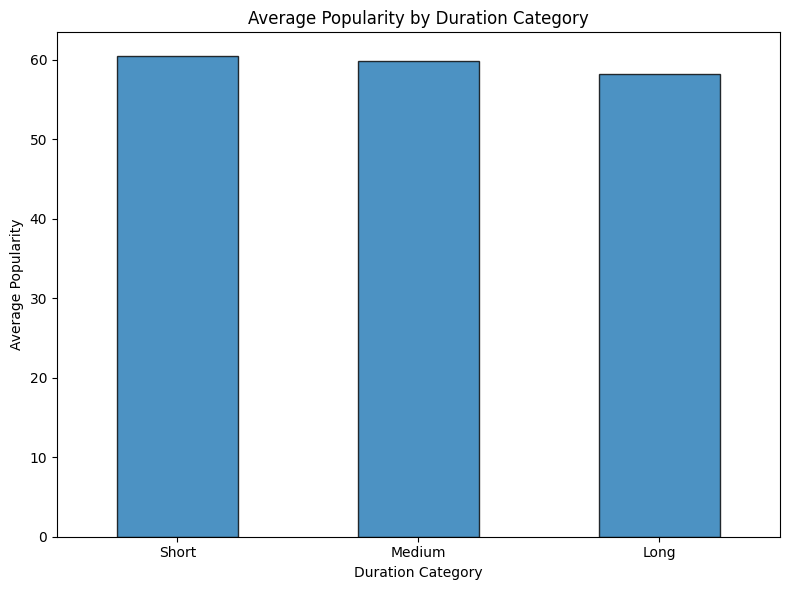

In [41]:

#   Plot a bar chart to compare the average `popularity` for each `duration` category from Exercise 7 

# Calculate average popularity by duration category
duration_avg_popularity = music.groupby('duration_category', observed =False)['popularity'].mean()

# Visualization: Bar chart for average popularity by duration category
plt.figure(figsize=(8, 6))
duration_avg_popularity.plot(kind='bar', alpha=0.8, edgecolor='black')
plt.title("Average Popularity by Duration Category")
plt.xlabel("Duration Category")
plt.ylabel("Average Popularity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()